rays aperture 0.0
rays aperture 0.021926913
rays aperture 0.22842407


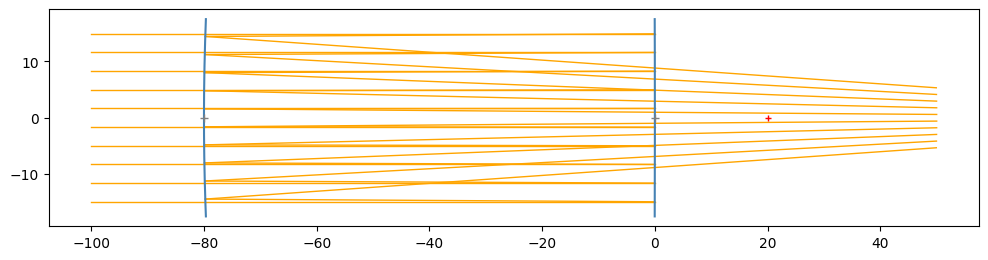

[  0/100] L= 22.352 | grad norm= 54850.3515625
[  5/100] L=  1.375 | grad norm= 12041.8701171875
[ 10/100] L=  3.799 | grad norm= 19539.822265625


[ 15/100] L=  0.008 | grad norm= 935.824951171875
[ 20/100] L=  1.424 | grad norm= 12709.98828125
[ 25/100] L=  0.041 | grad norm= 2099.36669921875


[ 30/100] L=  0.456 | grad norm= 6852.86083984375
[ 35/100] L=  0.071 | grad norm= 2720.826171875
[ 40/100] L=  0.142 | grad norm= 3902.5751953125


[ 45/100] L=  0.031 | grad norm= 1820.6885986328125
[ 50/100] L=  0.053 | grad norm= 2351.580810546875
[ 55/100] L=  0.009 | grad norm= 962.4063110351562


[ 60/100] L=  0.022 | grad norm= 1540.5616455078125
[ 65/100] L=  0.001 | grad norm= 293.1106262207031
[ 70/100] L=  0.009 | grad norm= 986.9247436523438


[ 75/100] L=  0.000 | grad norm= 100.3281021118164
[ 80/100] L=  0.003 | grad norm= 557.1077880859375
[ 85/100] L=  0.001 | grad norm= 270.5587463378906


[ 90/100] L=  0.000 | grad norm= 217.556884765625
[ 95/100] L=  0.001 | grad norm= 260.98846435546875


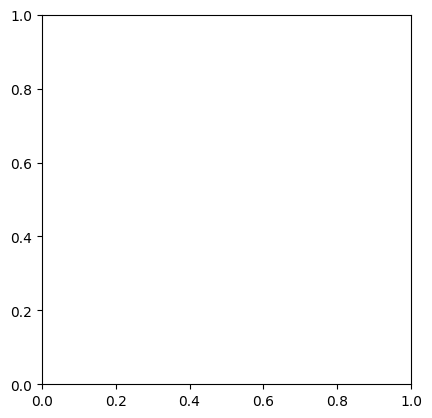

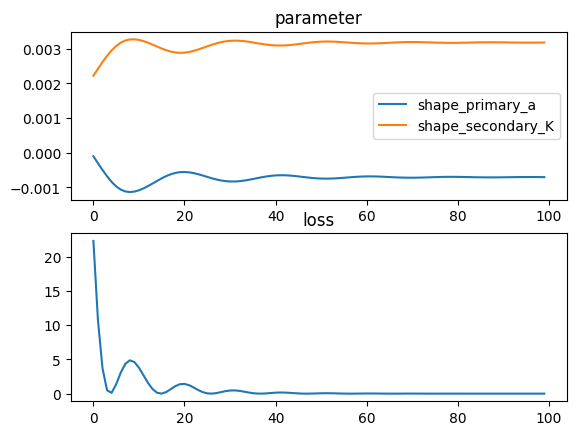

rays aperture 0.0
rays aperture 0.15398403
rays aperture 0.21020508


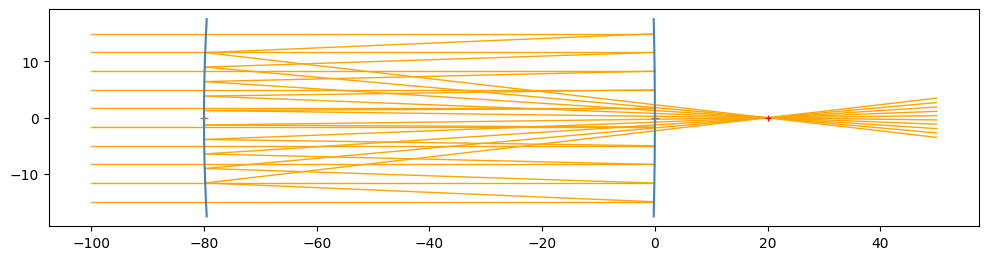

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm

# A simple reflecting telescope made of two concave mirrors

# In this example we keep the position of the mirrors constant
# and optimize their curvature jointly

# Note that there is more than one solution because rays can cross N times before focusing on the focal point
# We want the solution where they cross at the focal point for the first time
# TODO use image loss to account for flips
# aka "intermetidate image"

class Optics(tlm.Module):
    def __init__(self):
        super().__init__()

        self.shape_primary = tlm.Parabola(height=35., a=nn.Parameter(torch.tensor(-0.0001)))  # y = a * x^2
        self.shape_secondary = tlm.CircularArc(height=35., r=nn.Parameter(torch.tensor(450.0)))

        self.optics = tlm.OpticalSequence(
            tlm.Gap(-100),
            tlm.PointSourceAtInfinity(beam_diameter=30),
            tlm.Gap(100),
            
            tlm.ReflectiveSurface(self.shape_primary),
            tlm.Gap(-80),

            tlm.ReflectiveSurface(self.shape_secondary),

            tlm.Gap(100),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=2e-4),
    sampling = {"rays": 10},
    num_iter = 100
)

tlm.render_plt(optics)